In [1]:
import os
os.listdir("/kaggle/input")

['spacenet-an-optimally-distributed-astronomy-data']

In [6]:
import os

base_path = "/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam"
os.listdir(base_path)


['planet',
 'galaxy',
 'black hole',
 'asteroid',
 'comet',
 'star',
 'constellation',
 'nebula']

**There are total 8 Folders in this dataset**

In [41]:
import pandas as pd

class_counts = {}   #Made an empty dictionary

for i in os.listdir(base_path):
    i_path = os.path.join(base_path,i)
    class_counts[i] = len(os.listdir(i_path))

# I have iterated through eevery folder and got the len over here

#now i have a dictionary containing everything counts

df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])

df



,Image Count
planet,1472
galaxy,3984
black hole,656
asteroid,283
comet,416
star,3269
constellation,1552
nebula,1192


In [42]:
sum = 0

for i in class_counts:
    sum+=class_counts[i]
    

sum

12824

**This is the Image Count**

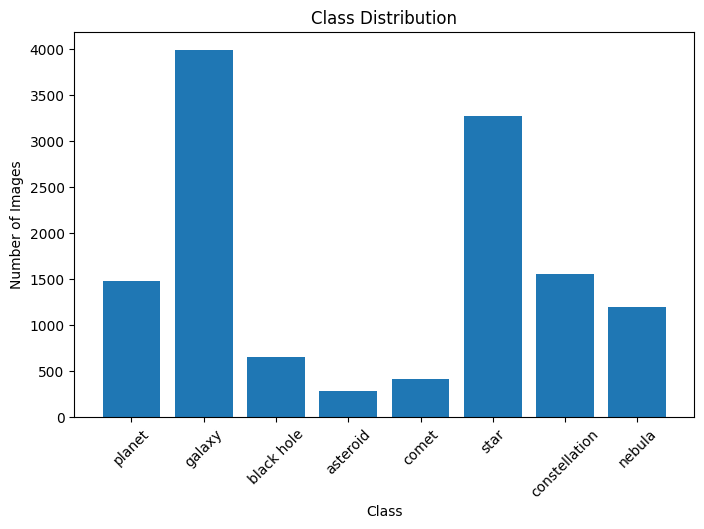

In [19]:
import matplotlib.pyplot as plt

plt.bar(df.index, df['Image Count'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=90)
plt.show()


**Will Check Sample Photo (randomly) from each folder**

ValueError: num must be an integer with 1 <= num <= 4, not 5

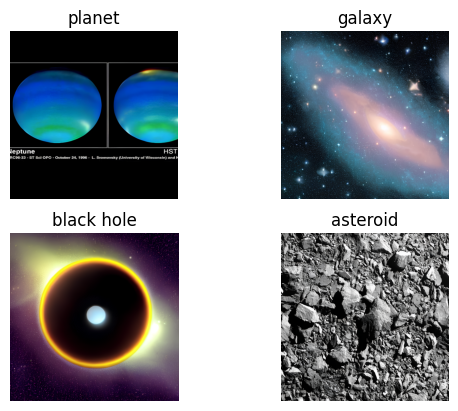

In [27]:

from PIL import Image
import random
import matplotlib.pyplot as plt

i=1

for cls in os.listdir(base_path):
    img_name = random.choice(os.listdir(os.path.join(base_path,cls)))
    img_path = os.path.join(base_path,cls,img_name)
    plt.subplot(2, 2, i)

    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

    i+=1

    plt.show

**Analyze Image Size and Format**

*Important for CNN*

In [35]:
from PIL import Image, UnidentifiedImageError
import os
import pandas as pd

sizes = []
formats = []
corrupted_files = []

for cls in os.listdir(base_path):
    class_folder = os.path.join(base_path, cls)

    if not os.path.isdir(class_folder):
        continue

    for img_name in os.listdir(class_folder)[:50]:
        img_path = os.path.join(class_folder, img_name)

        try:
            with Image.open(img_path) as img:
                sizes.append(img.size)
                formats.append(img.format)
        except (UnidentifiedImageError, IsADirectoryError, PermissionError):

            corrupted_files.append(img_path)
            continue

if formats:
    print(pd.Series(formats).value_counts())

PNG    385
Name: count, dtype: int64


In [36]:
sizes[:10]


[(2048, 2048),
 (2048, 2048),
 (2048, 2048),
 (2048, 2048),
 (2048, 2048),
 (2048, 2048),
 (2048, 2048),
 (2048, 2048),
 (2048, 2048),
 (2048, 2048)]

**Final Summary**

* Total Classes = 6
* Total Images = 1284
* Classes distibution : Little Imbalance
* Image Format = PNG
  